In [17]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.optimize import curve_fit
from scipy.special import gamma as gamma_fn
from matplotlib import rcParams as rc
import matplotlib as mpl
import matplotlib.cm as cm
from scipy.integrate import simps
import matplotlib.ticker as ticker
import matplotlib.tri as tri
from mpl_toolkits.axes_grid1 import make_axes_locatable

rc['legend.fontsize']=16
rc['axes.titlesize']=18
rc['lines.linewidth']=2
rc['lines.markersize']=6
rc['font.size']=18
rc['legend.handletextpad']= 0.2
rc['legend.frameon']=False
rc['text.usetex']=True
#print(rc.keys)

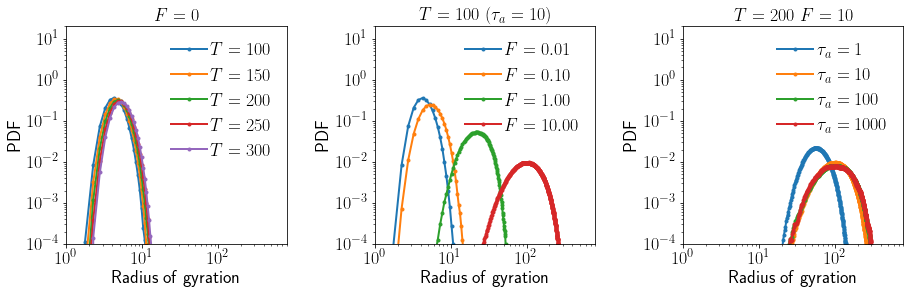

In [2]:
#plot bond lengths
fig,axes=plt.subplots(1,3,figsize=(15,4),gridspec_kw={'wspace':0.4, 'hspace':0.4,})
[ax1,ax2,ax3]=axes
c=['C{}'.format(ii) for ii in range(10)]
ind=4
fpath='../../data/ROUSE_chainN100_confinedR0500/'
# X,Y=[],[]

rg_av=[]
i1,i2,i3=0,0,0
par='rg'
for fname in os.listdir(fpath):
    if 'shape_descriptor' in fname:
        row=fname.split('_')
        T= float(row[ind].replace('T',''))
        F=float(row[ind+1].replace('F',''))
        Ta=float(row[ind+2].replace('Ta',''))
        kb=float(row[ind+7].replace('kb',''))
        Esoft=float(row[ind+3].replace('Esoft',''))
        R0=float(row[ind+4].replace('R0',''))
        dt=float(row[ind+8].replace('dt',''))
        
        data_npz=np.load(fpath+fname)
        # [k1,t1],pcov=curve_fit(Gamma_dist, data_npz[par][1],data_npz[par][0])
        

        if Ta==1. and F==0:
            ax1.plot(data_npz[par][1],data_npz[par][0],'.-', label='$T={:.0f}$'.format(T))
            # ax1.plot(np.linspace(0,20,500), Gamma_dist(np.linspace(0,20,500), k1, t1), '-',c=c[i1])
            ax1.set_title('$F=0$')

            # print(data_npz[par][0].sum(),np.sum(data_npz['rg'][0]*data_npz['rg'][1]))

        if T==100. and Ta==10:
            ax2.plot(data_npz[par][1],data_npz[par][0],'.-', label='$F={:.2f}$'.format(F))
            ax2.set_title('$T={:.0f}\ (\\tau_a={:.0f})$'.format(T,Ta))

        if T==200. and F==10:
            ax3.plot(data_npz[par][1],data_npz[par][0],'.-', label='$\\tau_a={:.0f}$'.format(Ta))
            ax3.set_title('$T={:.0f}\ F={:.0f}$'.format(T,F))

        if T==100:
            # X.append(F)
            # Y.append(Ta)
            # rg_av.append(data_npz[par][1][np.where(data_npz[par][1]==data_npz[par][1].max())][0])
            rg_av.append(simps(data_npz[par][1]*data_npz[par][0], data_npz[par][1]))

# ax4.semilogx([xx**2*yy/(0.1*0.0083*300) for xx,yy in zip(X,Y)],rg_av,'.')

# ax1.set_xlim(0,15)
# ax3.set_xlim(0,5)
for ax in axes.flatten():
    ax.legend(loc='upper right')
    ax.loglog()
    ax.set_ylim(1e-4,20)
    ax.set_xlim(1,800)
    ax.set_ylabel('PDF')
    ax.set_xlabel('Radius of gyration')

# fig.savefig('../../plots/Rouse/rg.png', dpi=300, bbox_inches='tight')


2000.0


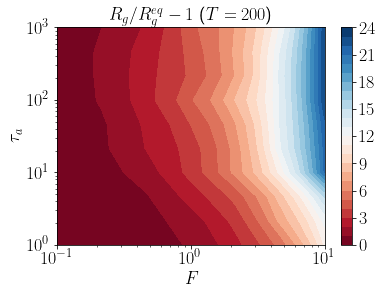

In [103]:
ind=4
fpath='../../data/ROUSE_chainN100_confinedR0500/'
X,Y=[],[]

T0=200
bond_sd=[]
bond_av=[]
rg_av=[]
par='rg'
rg_eq=0
for fname in os.listdir(fpath):
    if 'shape_descriptor' in fname:
        row=fname.split('_')
        T= float(row[ind].replace('T',''))
        F=float(row[ind+1].replace('F',''))
        Ta=float(row[ind+2].replace('Ta',''))
        kb=float(row[ind+7].replace('kb',''))
        Esoft=float(row[ind+3].replace('Esoft',''))
        R0=float(row[ind+4].replace('R0',''))
        dt=float(row[ind+8].replace('dt',''))
        if kb==5: continue
        data_npz=np.load(fpath+fname)
        # [k1,t1],pcov=curve_fit(Gamma_dist, data_npz[par][1],data_npz[par][0])
        
        if T==T0:
            if 'shape' in fname:
                X.append(F)
                Y.append(Ta)
                # rg_av.append(data_npz[par][1][np.where(data_npz[par][1]==data_npz[par][1].max())][0])
                val=simps(data_npz[par][1]*data_npz[par][0], data_npz[par][1])
                rg_av.append(val)
                if F==0: rg_eq=val

Xi,Yi=np.meshgrid(np.logspace(-2,1,10),np.logspace(0,3,10))
triang=tri.Triangulation(X,Y)
interpZ=tri.LinearTriInterpolator(triang,np.array(rg_av)/rg_eq -1)
Zi=interpZ(Xi,Yi)
print(max(Y))
ta,f=np.meshgrid(np.logspace(0,3,100),np.logspace(-3,1,100))
bet=f**2*ta/(0.1*0.0083*T0)
plt.contourf(Xi, Yi, Zi,levels=np.arange(0.,25,1),cmap='RdBu')#,alpha=0.6)
plt.colorbar()
# plt.plot(X,Y,'k.')
# cs=plt.contour(f, ta, bet,colors='k',levels=[1e2,1e3, 1e4],linewidths=1)
# plt.clabel(cs, cs.levels, inline=True,fmt=fmt, fontsize=16)
# plt.semilogy()
plt.loglog()
# plt.ylim(1,1e6)
plt.xlim(0.1,10)

plt.xlabel('$F$')
plt.ylabel('$\\tau_a$')
plt.title('$R_g/R_g^{eq}-1$'+' ($T={}$)'.format(T0))
plt.ylim([1,1e3])


plt.savefig('../../plots/Rouse/rg_norm_fold_change_T{}.png'.format(T0), dpi=300, bbox_inches='tight')




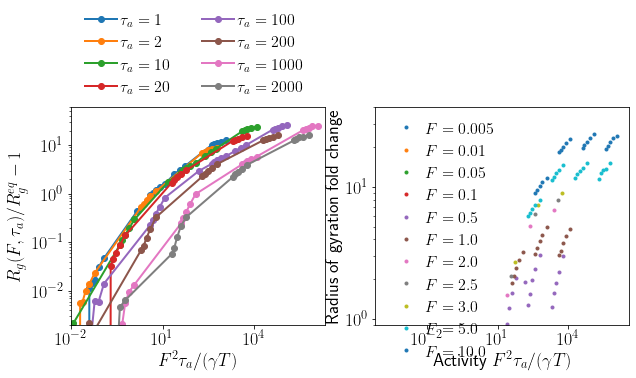

In [113]:
fig,[ax1,ax2]=plt.subplots(1,2, figsize=(10,4))

ind=4
fpath='../../data/ROUSE_chainN100_confinedR0500/N30/'
X,Y=[],[]

T0=300
Ts=[]
betas=[]
bond_sd=[]
bond_av=[]
Tas=[]
Fs=[]
rg_av=[]
par='rg'
Ns=[100,300]
for jj,fpath in enumerate(['../../data/ROUSE_chainN100_confinedR0500/', '../../data/ROUSE_chainN100_confinedR0500/N300/']):
    N=Ns[jj]
    if jj==1: continue

    for fname in os.listdir(fpath):
        if 'shape_descriptor' in fname:
            row=fname.split('_')
            T= float(row[ind].replace('T',''))
            F=float(row[ind+1].replace('F',''))
            Ta=float(row[ind+2].replace('Ta',''))
            kb=float(row[ind+7].replace('kb',''))
            Esoft=float(row[ind+3].replace('Esoft',''))
            R0=float(row[ind+4].replace('R0',''))
            dt=float(row[ind+8].replace('dt',''))
            if kb==5: continue
            data_npz=np.load(fpath+fname)
            t1=N**2*0.1/(kb*np.pi**2)
            beta=F**2*Ta/(0.1*0.0083*T)
            

            # beta=F**2*Ta/0.1
            rg_mean=simps(data_npz[par][1]*data_npz[par][0], data_npz[par][1])
            rg_sd=np.sqrt(simps((data_npz[par][1]-rg_mean)**2*data_npz[par][0], data_npz[par][1]))
            rg_eq=0
            for feq in os.listdir(fpath):
                if feq == fname.replace('_F{}_Ta{}_'.format(F,Ta),'_F0.0_Ta1.0_'):
                    data_eq=np.load(fpath+feq)
                    rg_eq=simps(data_eq[par][1]*data_eq[par][0], data_eq[par][1])
                
            rg_av.append((F,Ta,T,beta,rg_mean/rg_eq-1))
            Tas.append(Ta)
            Fs.append(F)
            Ts.append(T)

#plot rg ratio as function of activity
# rg_av=sorted(rg_av,key=lambda x: x[2])
for Ta in np.unique(Tas):
    
    rg_Ta=sorted([xx for xx in rg_av if xx[1]==Ta], key=lambda x:x[3])
    ax1.plot([xx[3] for xx in rg_Ta],[xx[4] for xx in rg_Ta],'o-', label='$\\tau_a={:.0f}$'.format(Ta))

ax1.legend(loc='upper left',ncol=2,bbox_to_anchor=(0,1.5))
ax1.set_ylabel('$R_g(F,\\tau_a)/R_g^{eq}-1$')
ax1.set_xlabel('$F^2\\tau_a/(\\gamma T)$')

# ax1.axhline(1,c='k',ls='--',lw=1)
ax1.set_xscale('Log')
ax1.set_yscale('Log')
ax1.set_ylim([2e-3,60])
ax1.set_xlim(1e-2,2e6)


for F in np.unique(Fs):
    if F==0: continue
    rg_F=sorted([xx for xx in rg_av if xx[0]==F], key=lambda x:x[2])
    ax2.loglog([xx[3] for xx in rg_F],[xx[4]-1 for xx in rg_F],'.', label='$F={}$'.format(F))

ax2.legend(loc='upper left')
ax2.set_ylabel('Radius of gyration fold change')
ax2.set_xlabel('Activity $F^2\\tau_a/(\\gamma T)$')
ax2.set_ylim(0.9,40)
fig.savefig('../../plots/Rouse/rg_norm_fold_change_t.png', dpi=300, bbox_inches='tight')




In [128]:
ind=4
fpath='../../data/ROUSE_chainN100_confinedR0500/'
X,Y=[],[]

T0=200
bond_sd=[]
bond_av=[]
rg_av=[]
par='rg'
Neff=[]
for fname in os.listdir(fpath):
    if 'shape_descriptor' in fname:
        row=fname.split('_')
        T= float(row[ind].replace('T',''))
        F=float(row[ind+1].replace('F',''))
        Ta=float(row[ind+2].replace('Ta',''))
        kb=float(row[ind+7].replace('kb',''))
        Esoft=float(row[ind+3].replace('Esoft',''))
        R0=float(row[ind+4].replace('R0',''))
        dt=float(row[ind+8].replace('dt',''))
        if kb==5: continue
        # data_npz=np.load(fpath+fname)
        # [k1,t1],pcov=curve_fit(Gamma_dist, data_npz[par][1],data_npz[par][0])
        
        if T==T0:
            if 'shape_descriptor' in fname:
                data_npz=np.load(fpath+fname)
                X.append(F)
                Y.append(Ta)
                # rg_av.append(data_npz[par][1][np.where(data_npz[par][1]==data_npz[par][1].max())][0])
                val=simps(data_npz[par][1]*data_npz[par][0], data_npz[par][1])
                rg_av.append(val)
                print(data_npz.files)

                fname_eq=fname.replace('_F{}_Ta{}_'.format(F,Ta),'_F0.0_Ta1.0_')
                rg_eq=0
                bond_eq_av=0
                bond_eq_var=0
                print(fname_eq)
                for f_eq in os.listdir(fpath):
                    if f_eq==fname_eq and '.npz' in f_eq:
                        print('hello',feq, fname_eq)
                        data_rg_eq=np.load(fpath+feq)
                        # print(data_rg_eq.files)
                        rg_eq=simps(data_rg_eq[par][1]*data_rg_eq[par][0], data_rg_eq[par][1])

                    # if f_eq==fname_eq.replace('_shape_descriptors','_bondlens'):
                    #     data_bond_eq=np.load(fpath+feq)
                    #     print(f_eq)#data_bond_eq.files)
                    #     bond_eq_av=simps(data_bond_eq['hist']*data_bond_eq['bins'], data_bond_eq['bins'])
                    #     bond_eq_var=simps(data_bond_eq['hist']*(data_bond_eq['bins']-bond_eq_av)**2, data_bond_eq['bins'])

                bond_av=0
                bond_var=0
                for fbond in os.listdir(fpath):
                    if fbond==fname.replace('_shape_descriptors','_bondlens'):
                        data_bond=np.load(fpath+fbond)
                        
                        bond_av=simps(data_bond['hist']*data_bond['bins'], data_bond['bins'])
                        bond_var=simps(data_bond['hist']*(data_bond['bins']-bond_av)**2, data_bond['bins'])

                N_noneq=rg_av**2/bond_var
                N_eq=rg_eq**2/bond_eq_var
                
                Neff.append(N_noneq/N_eq)

Xi,Yi=np.meshgrid(np.logspace(-2,1,10),np.logspace(0,3,10))
triang=tri.Triangulation(X,Y)
interpZ=tri.LinearTriInterpolator(triang,np.array(Neff))
Zi=interpZ(Xi,Yi)
# print(max(Y))
# ta,f=np.meshgrid(np.logspace(0,3,100),np.logspace(-3,1,100))
# bet=f**2*ta/(0.1*0.0083*T0)
plt.contourf(Xi, Yi, Zi,levels=np.arange(0.,50,1),cmap='RdBu')#,alpha=0.6)
plt.colorbar()
# plt.plot(X,Y,'k.')
# cs=plt.contour(f, ta, bet,colors='k',levels=[1e2,1e3, 1e4],linewidths=1)
# plt.clabel(cs, cs.levels, inline=True,fmt=fmt, fontsize=16)
# plt.semilogy()
plt.loglog()
# plt.ylim(1,1e6)
plt.xlim(0.1,10)

plt.xlabel('$F$')
plt.ylabel('$\\tau_a$')
plt.title('$R_g/R_g^{eq}-1$'+' ($T={}$)'.format(T0))
plt.ylim([1,1e3])


# plt.savefig('../../plots/Rouse/rg_norm_fold_change_T{}.png'.format(T0), dpi=300, bbox_inches='tight')




['rg', 'asph', 'acyl']
analyze_traj_Rouse_chain_T200.0_F0.0_Ta1.0_Esoft0_R0500_Na1200_blocksize100_kb10.0_dt0.001_kr30.0_shape_descriptors.npz
hello RC100_RDP_bond_shape.zip analyze_traj_Rouse_chain_T200.0_F0.0_Ta1.0_Esoft0_R0500_Na1200_blocksize100_kb10.0_dt0.001_kr30.0_shape_descriptors.npz


KeyError: 'rg is not a file in the archive'